In [3]:
# 데이터프레임 패키지
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# 02_농어의_길이와_무게_데이터(배열).txt

perch_length= np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

# 길이와 무게 차원
print(perch_length.shape,perch_weight.shape)

(56,) (56,)


In [11]:
# 예측까지 실행

# 데이터 셋 분류
train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weight,
                                                                      random_state=42)
# input 데이터에 대해서는 행렬의 2차원으로 만들어야함
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

# 모델 생성 / 최근접 이웃 회귀
kn = KNeighborsRegressor(n_neighbors=3)
# 훈련
kn.fit(train_input,train_target)
# 검증(결정계수)
kn.score(test_input,test_target)

0.9746459963987609

In [12]:
print(kn.predict([[50]]))

[1033.33333333]


In [20]:
# 농어길이 100에 대해 무게 예측
print(kn.predict([[100]]))

[1033.33333333]


거리 :  [[6. 7. 7.]] 
인덱스위치 :  [[34  8 14]]


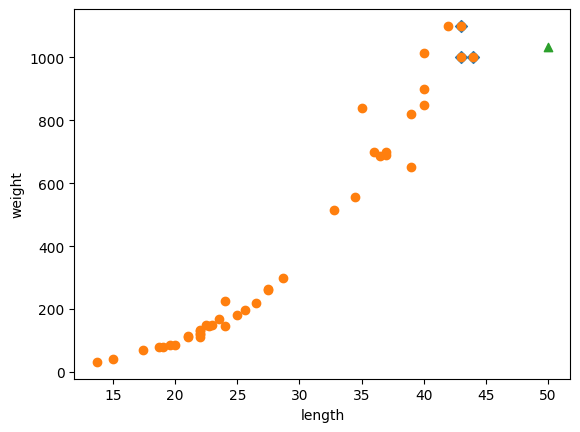

In [19]:
# 산점도 그리기 
# 훈련데이터, 50cm, 이웃 3개 산점도 그리기 

# 최근접 이웃 3개 값 확인
distances, idndexes = kn.kneighbors([[50]],n_neighbors=3)
print("거리 : ", distances,"\n인덱스위치 : ", idndexes)
plt.scatter(train_input[idndexes],train_target[idndexes],marker="D")

# train 데이터를 이용해 산점도 그리기
plt.scatter(train_input,train_target)
# 임의 값(테스트 데이터)

# 50cm 산점도
plt.scatter(50,1033,marker="^")


plt.xlabel("length")
plt.ylabel("weight")
#plt.legend()
plt.show()

In [ ]:
# KNN모델은 이웃하는 가장 가까운 개수 체크하기 때문에 예측에 어려움이 있다 -> 한계